# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [32]:
# Load data
df = pd.read_csv("./data/cars.csv")
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [33]:
df.shape

(11914, 15)

In [34]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [35]:
# 1. Print the number of duplicate rows we have in our dataframe.

df.duplicated().sum()

720

In [36]:
#  2. Modify our df to have all duplicate rows removed. 

df.drop_duplicates(inplace=True)

In [37]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

df.duplicated().sum()

0

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [38]:
# * Which column has the most null values and how many null values does it have?

df.isnull().agg('sum')



Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [39]:
# * Print how long our dataframe is.

df.shape[0]

11194

In [40]:
# * Remove any row that has a null value in it. 
df.dropna(inplace=True)


In [41]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
df.isnull().sum()


Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

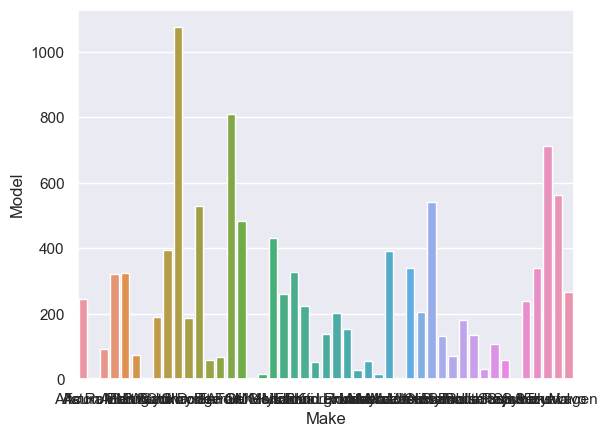

In [42]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
make_data = df.groupby("Make")['Model'].count().reset_index()
# groupby with Make columns(brand) and bring model count(how many numbers) and reset index old index as a columns now we have new idnex 
sns.barplot(data=make_data, x='Make', y='Model')
plt.show()



In [43]:
order_1 = make_data.sort_values('Model', ascending=False).Make
# largest to smallest (bring only brand columns)
order_1

9         Chevrolet
14             Ford
44           Toyota
45       Volkswagen
33           Nissan
11            Dodge
15              GMC
18            Honda
8          Cadillac
29            Mazda
31    Mercedes-Benz
43           Suzuki
20         Infiniti
4               BMW
3              Audi
46            Volvo
19          Hyundai
0             Acura
42           Subaru
21              Kia
32       Mitsubishi
24            Lexus
7             Buick
10         Chrysler
36          Pontiac
25          Lincoln
23       Land Rover
37          Porsche
34       Oldsmobile
39             Saab
2      Aston Martin
5           Bentley
35         Plymouth
13          Ferrari
40            Scion
12             FIAT
27         Maserati
22      Lamborghini
38      Rolls-Royce
26            Lotus
17           HUMMER
28          Maybach
1        Alfa Romeo
30          McLaren
16          Genesis
6           Bugatti
41           Spyker
Name: Make, dtype: object

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

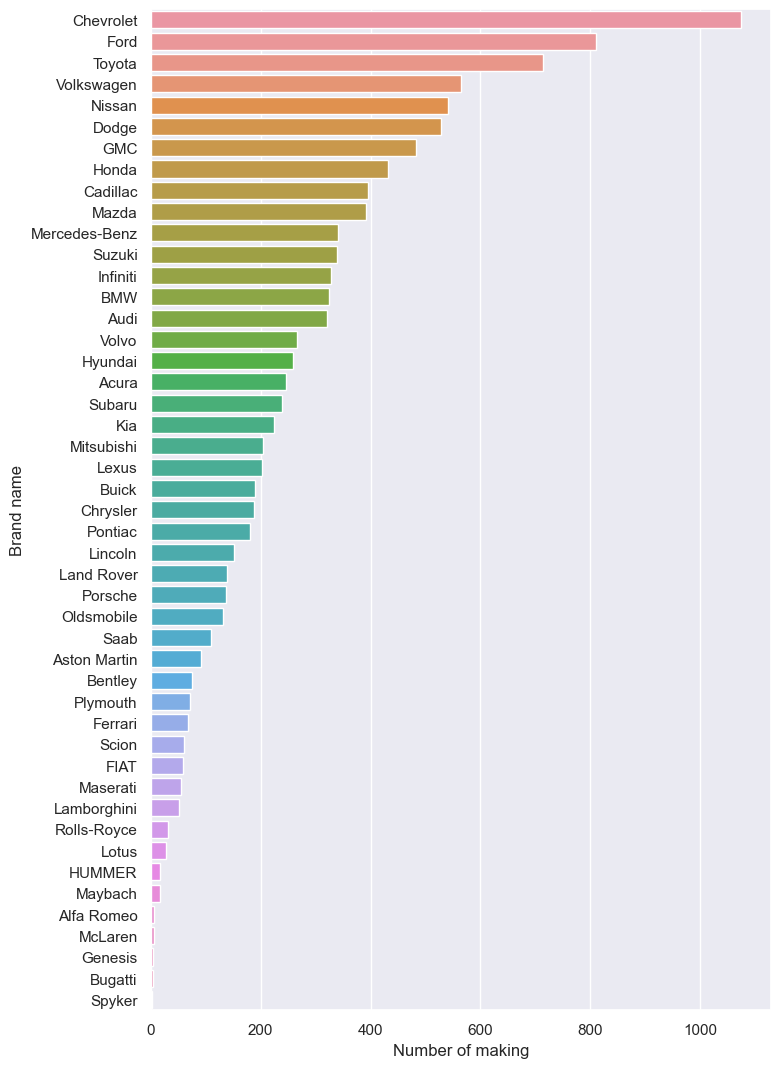

In [44]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.

plt.figure(figsize=(8,13))
plot = sns.barplot(data=make_data, x='Model', y='Make', order=order_1,)
plot.set(xlabel = "Number of making" , ylabel = "Brand name")
plt.show()


# Make a timeline line chart in which the x-axis is the Year, and the y-axis is the mean MSRP.
* you're going to have to do a `groupby` for this one for sure. 
* What's noticeable about it and what do you think the error is...


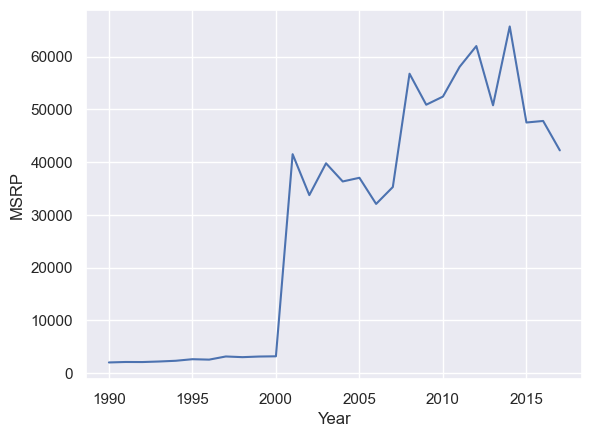

<Figure size 800x1300 with 0 Axes>

In [45]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
year_msrp_df = df.groupby("Year")['MSRP'].agg('mean').reset_index()
sns.lineplot(data=year_msrp_df, x='Year', y='MSRP')
plt.figure(figsize=(8,13))
plt.show()



# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [46]:
# Make a column where is 10 when year is less than 2000, else 1.
before_2000 = df["Year"] <= 2000 
before_2000
times_10_t= df['MSRP'] * 10 
times_10_t
times_10_f = df["MSRP"]
times_10_f
df['Adjusted_price'] = np.where(before_2000,times_10_t,times_10_f)
df.head(5)
# # Multiply the MSRP by the price adjuster.



,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

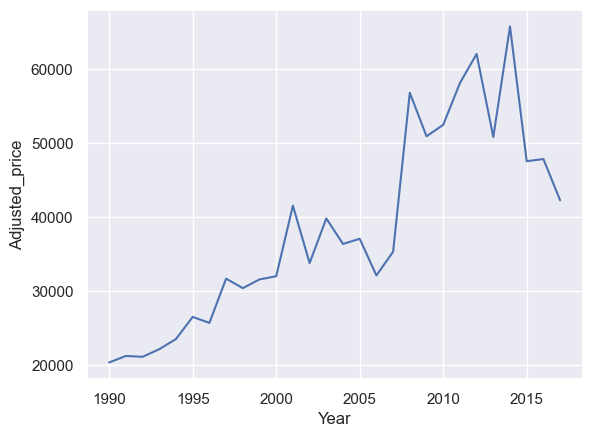

<Figure size 800x1300 with 0 Axes>

In [47]:
# Plot new prices
year_msrp_df = df.groupby("Year")['Adjusted_price'].agg('mean').reset_index()
sns.lineplot(data=year_msrp_df, x='Year', y='Adjusted_price')
plt.figure(figsize=(8,13))
plt.show()


# Plot the relationship between Engine HP and highway MPG

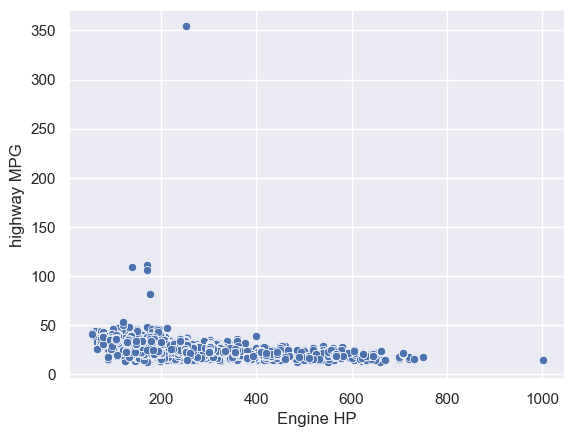

<Figure size 800x1300 with 0 Axes>

In [48]:
# Plot the relationship between Engine HP and highway MPG
sns.scatterplot(data=df, x='Engine HP', y='highway MPG')
plt.figure(figsize=(8,13))
plt.show()

In [49]:
### IF WE DIDN'T GET TO REMOVING OUTLIERS IN CLASS, THEN YOU CAN SKIP THIS SECTION
# Remove any outliers from Engine HP and highway MPG 


# Replot the relationship between Engine HP and highway MPG


In [50]:
# Re-Plot the relationship between Engine HP and highway MPG


# Make a scatter plot of Engine HP vs highway MPG

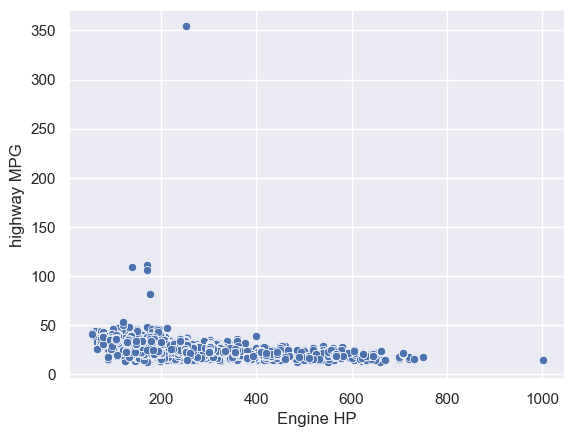

<Figure size 800x1300 with 0 Axes>

In [51]:
# Make a scatter plot of Engine HP vs highway MPG
sns.scatterplot(data=df, x='Engine HP', y='highway MPG')
plt.figure(figsize=(8,13))
plt.show()

# What does this plot tell you about how Engine HP affects highway MPG?

In [52]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('as Engine Hp incresae, highway MPG decrease ')

as Engine Hp incresae, highway MPG decrease 


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

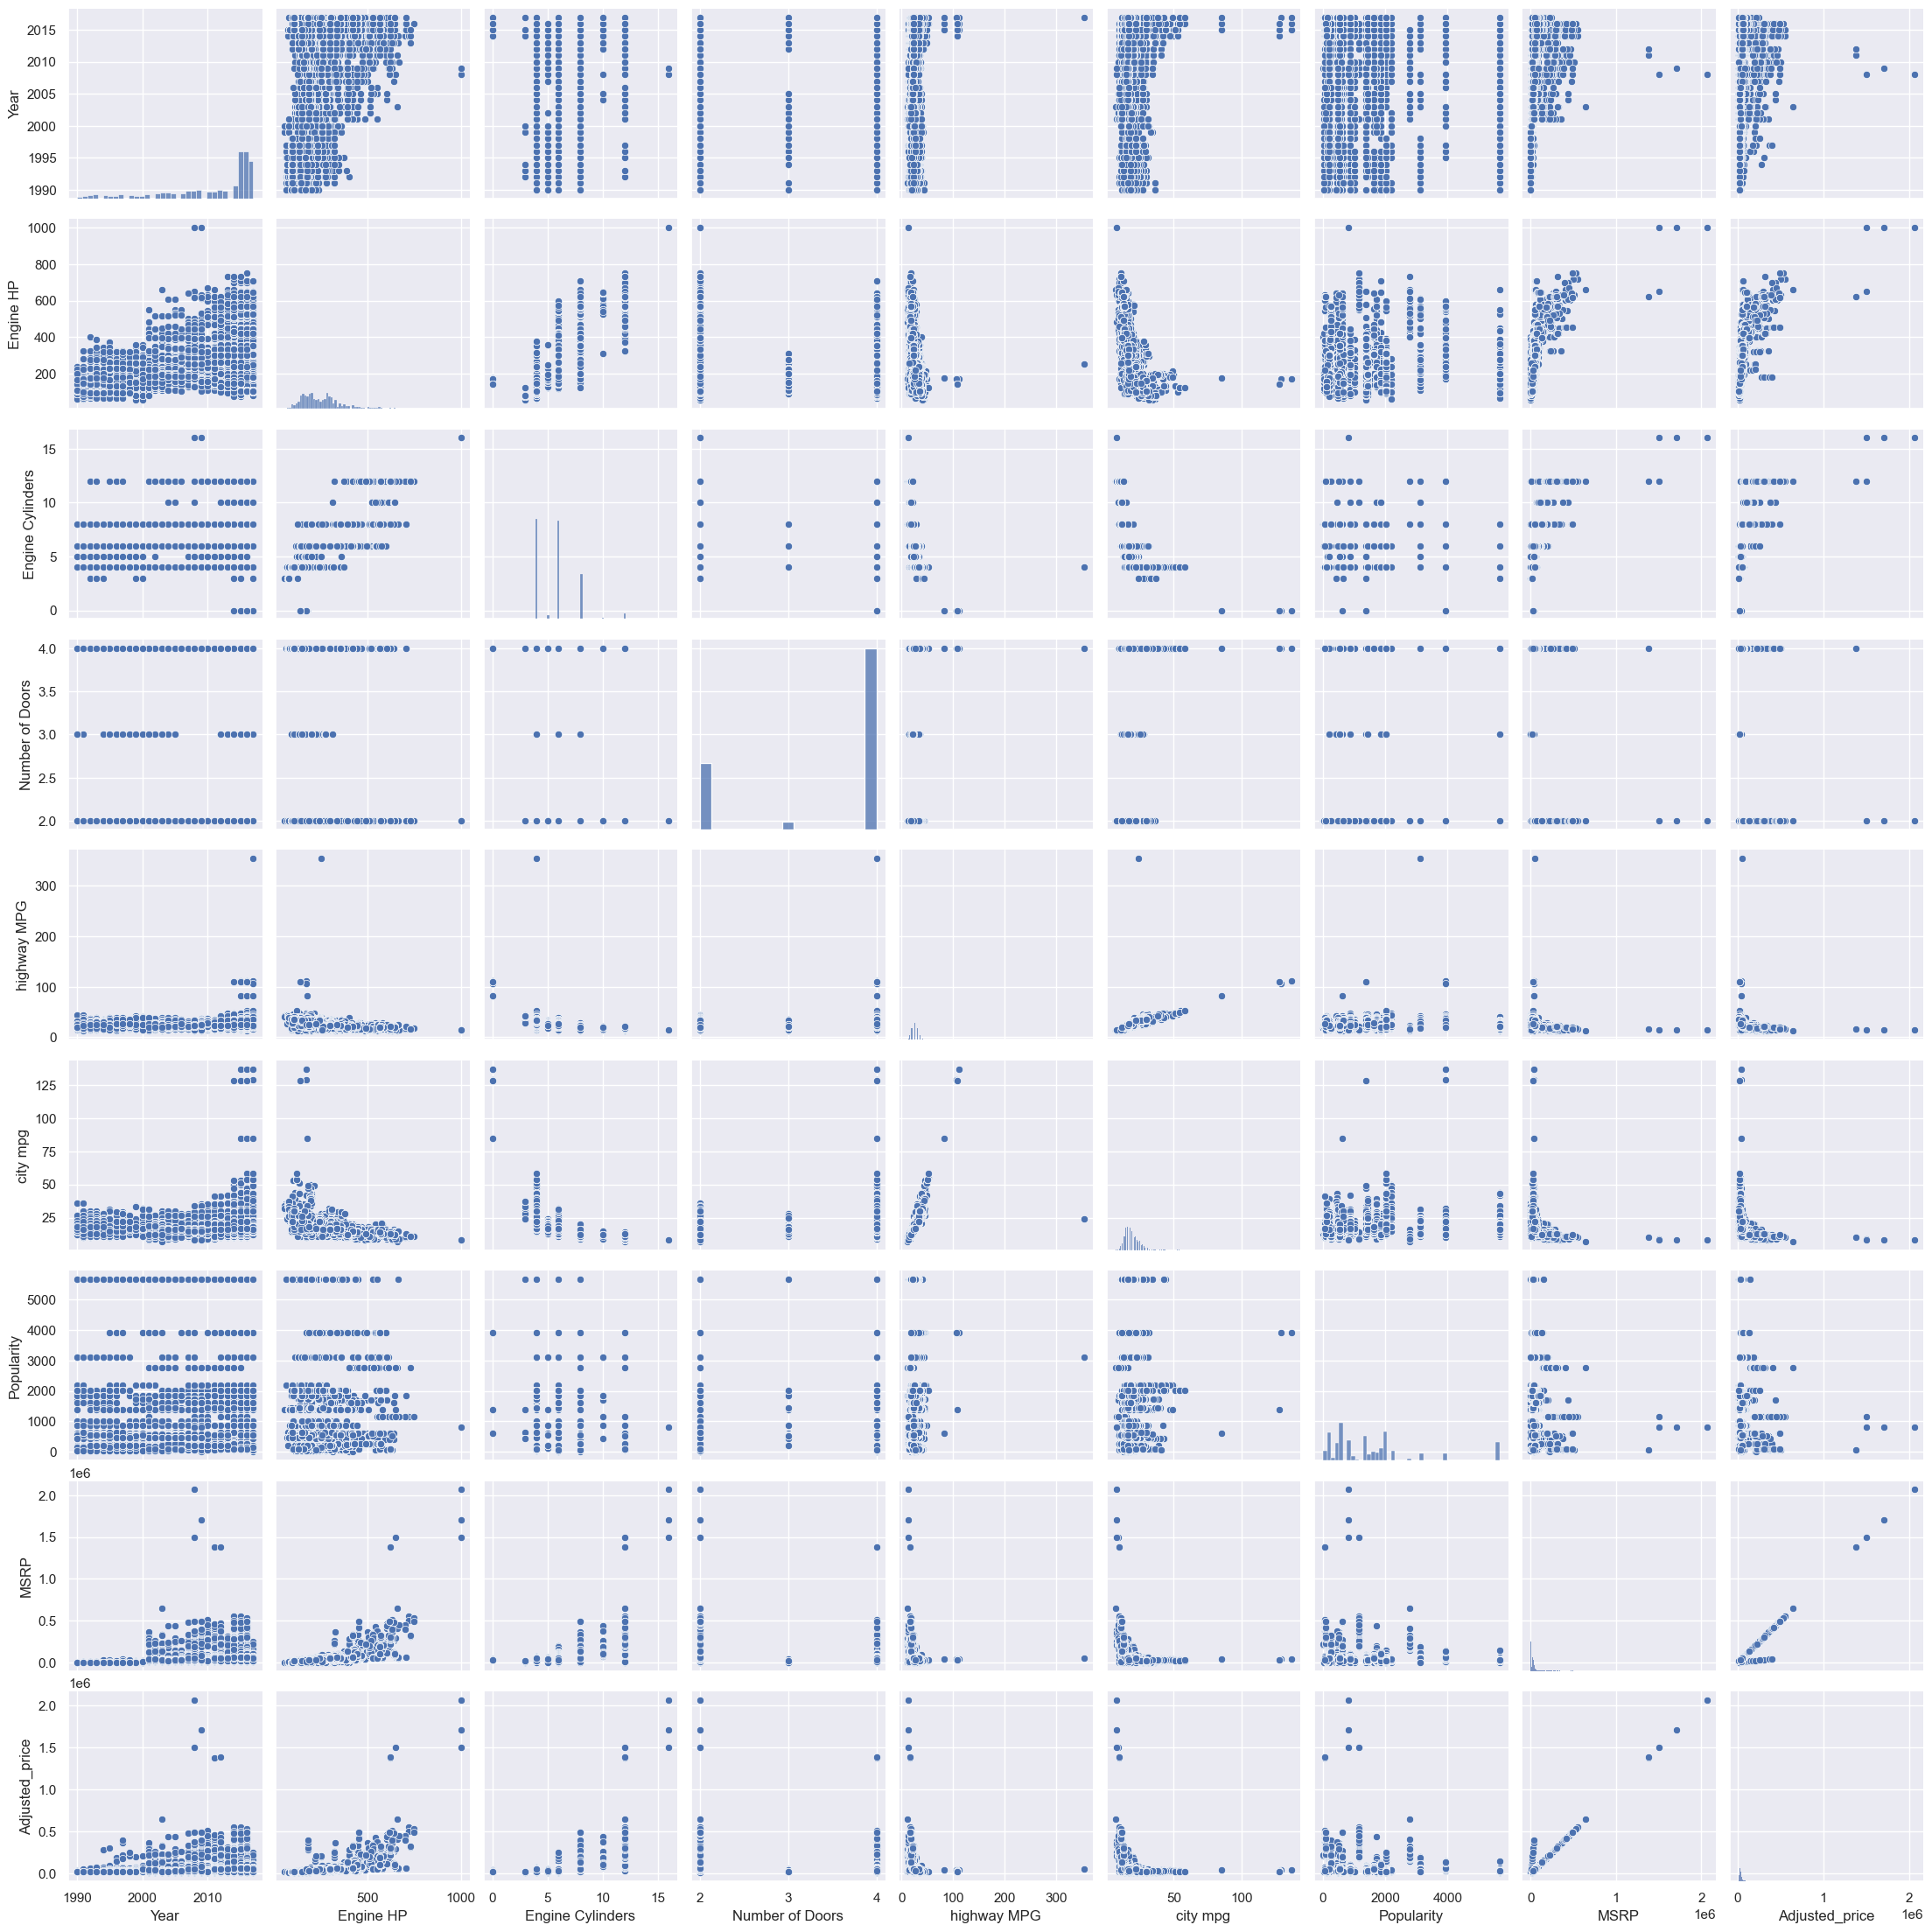

In [57]:
# Using a pairplot, display all of the linear relationship.

sns.pairplot(df)
plt.show()

In [54]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).



# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

/var/folders/ns/z77kcwn53pg91qp29pzq71wm0000gn/T/ipykernel_70907/2211502769.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='crest')


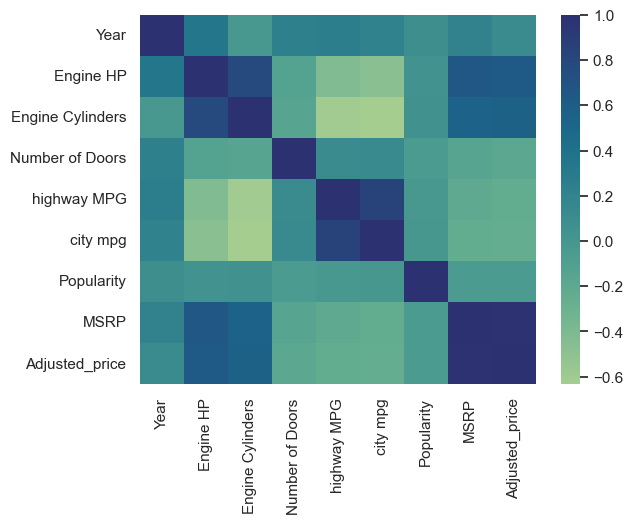

In [55]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

sns.heatmap(df.corr(),cmap='crest')
plt.show()

In [56]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('based on graph i see strong correlation between engine HP and engine cylinder beside MSRP and aadjusted price')

based on graph i see strong correlation between engine HP and engine cylinder beside MSRP and aadjusted price


# [EXTRA CREDIT] 
* (EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

* (Easy) Learn more about cleaning data by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_1.ipynb`.

* (Medium) Do the same vizualizations using bokeh by following along in TA Stevens tutorial in the TA-Tips folder named `SS-Tips.ipynb`.


* (Medium) Learn how to remove outliers properly by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_2.ipynb`.

* (Variable) Complete one or more of the [Extra-Extra credit](https://docs.google.com/document/d/1D99fY13cF3kzIiJILZ3fwzhOF73z_xPBNxxweMpBkOY/edit) items. 


